## <font color='DarkBlue'> Изучение общей информации файлов с данными. 

Для чтения файла импортируем библиотеку pandas, также нам понадобятся библиотеки numpy, matplotlib.pyplot, scipy.stats, datetime

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# настроим вывод колонок на экран
pd.options.display.float_format = '{: .2f}'.format
pd.options.display.max_colwidth = 150

In [3]:
#создадим словарь с названиями файлов, чтобы использовать его в функции
dict = {0:'hypothesis.csv', 1:'orders.csv', 2:'visitors.csv'}

In [4]:
# describe_column, которая будет выдавать описание данных , количество пропусков,уникальные значения для значений типа 'object
def describe_column(column):
    print('Тип данных:', column.dtypes)
    print('Количество пропусков:', column.isna().sum())
    if column.dtypes == 'object':
        print('Уникальные значения столбца', column.sort_values().unique())
    print('Описание данных:')
    print(column.describe())
    print()

In [5]:
# функция для просмотра файлов 
def description_files(dict,i):
    # используем globals(), чтобы создавать датафреймы с тем же названием, что и переданные файлы
    try:
        globals()[dict[i].split('.')[0]]  = pd.read_csv(dict[i])
    except:
        globals()[dict[i].split('.')[0]] = pd.read_csv(f'/datasets/{dict[i]}')
    print(f'Изучим информацию файла {dict[i]}')
    print()
    print('Посмотрим первые 5 строк')
    display(globals()[dict[i].split('.')[0]].head(5))
    print()
    print('Выведем информацию о типах данных')
    globals()[dict[i].split('.')[0]].info()
    print()
    print('Проверим пропуски')
    display(globals()[dict[i].split('.')[0]].isna().sum())
    print('Пройдемся по значениям каждого столбца')
    print()
    for column in globals()[dict[i].split('.')[0]]:
        columnSeriesObj = globals()[dict[i].split('.')[0]][column]
        print(f"файл: {dict[i]}, столбец: {column}")
        print()
        describe_column(globals()[dict[i].split('.')[0]][column])
        print() 
    print('Проверим дубликаты')
    if globals()[dict[i].split('.')[0]].duplicated().sum() ==0:
        print('Дубликатов нет')
    else:
        globals()[dict[i].split('.')[0]].drop_duplicates()
        print('Дубликаты удалены')
       
    

In [6]:
# используем цикл, чтобы пройтись по трем предоставленным файлам
for i in range (3):
    description_files(dict,i)

Изучим информацию файла hypothesis.csv

Посмотрим первые 5 строк


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1



Выведем информацию о типах данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes

Проверим пропуски


Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

Пройдемся по значениям каждого столбца

файл: hypothesis.csv, столбец: Hypothesis

Тип данных: object
Количество пропусков: 0
Уникальные значения столбца ['Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа'
 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'
 'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов'
 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'
 'Запустить акцию, дающую скидку на товар в день рождения'
 'Запустить собственную службу доставки, что сократит срок доставки заказов'
 'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар'
 'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей'
 'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию']
Описание дан

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B



Выведем информацию о типах данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB

Проверим пропуски


transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Пройдемся по значениям каждого столбца

файл: orders.csv, столбец: transactionId

Тип данных: int64
Количество пропусков: 0
Описание данных:
count          1197.00
mean     2155621385.53
std      1229084904.76
min         1062393.00
25%      1166775572.00
50%      2145193898.00
75%      3237740112.00
max      4293855558.00
Name: transactionId, dtype: float64


файл: orders.csv, столбец: visitorId

Тип данных: int64
Количество пропусков: 0
Описание данных:
count          1197.00
mean     2165960143.10
std      1236014192.15
min         5114589.00
25%      1111826046.00
50%      2217984702.00
75%      3177606451.00
max      4283872382.00
Name: visitorId, dtype: float64


файл: orders.csv, столбец: date

Тип данных: object
Количество пропусков: 0
Уникальные значения столбца ['2019-08-01' '2019-08-02' '2019-08-03' '2019-08-04' '2019-08-05'
 '2019-08-06' '2019-08-07' '2019-08-08' '2019-08-09' '2019-08-10'
 '2019-08-11' '2019-08-12' '2019-08-13' '2019-08-14' '2019-08-15'
 '2019-08-16' '2019-

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756



Выведем информацию о типах данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB

Проверим пропуски


date        0
group       0
visitors    0
dtype: int64

Пройдемся по значениям каждого столбца

файл: visitors.csv, столбец: date

Тип данных: object
Количество пропусков: 0
Уникальные значения столбца ['2019-08-01' '2019-08-02' '2019-08-03' '2019-08-04' '2019-08-05'
 '2019-08-06' '2019-08-07' '2019-08-08' '2019-08-09' '2019-08-10'
 '2019-08-11' '2019-08-12' '2019-08-13' '2019-08-14' '2019-08-15'
 '2019-08-16' '2019-08-17' '2019-08-18' '2019-08-19' '2019-08-20'
 '2019-08-21' '2019-08-22' '2019-08-23' '2019-08-24' '2019-08-25'
 '2019-08-26' '2019-08-27' '2019-08-28' '2019-08-29' '2019-08-30'
 '2019-08-31']
Описание данных:
count             62
unique            31
top       2019-08-01
freq               2
Name: date, dtype: object


файл: visitors.csv, столбец: group

Тип данных: object
Количество пропусков: 0
Уникальные значения столбца ['A' 'B']
Описание данных:
count     62
unique     2
top        A
freq      31
Name: group, dtype: object


файл: visitors.csv, столбец: visitors

Тип данных: int64
Количество пропусков: 0
Описание данных:
c

<div style='border:solid blue 1px; padding: 10px'>
 Пропусков в данных нет. Дубликаты отсутствуют.   
    
Итак, в файле `hypothesis` имеем 9 гипотез:
    
* 0. 'Добавить двановых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'
* 1. 'Запустить собственную службу доставки, что сократит срок доставки заказов'
* 2. 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа'
* 3. 'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар'
* 4. 'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей'   
* 5. 'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов'
* 6. 'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию'
* 7. 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'
* 8.  'Запустить акцию, дающую скидку на товар в день рождения'

Шкалы параметров:
* влияние (`Impact`): от 1 до 10
* уверенность в гипотезе (`Confidence`): от 1 до 9 (в условии сказано, что шкала 10-бальная, значит, ни в одной гипотезе не уверены на 10 баллов)
* затраты ресурсов (`Efforts`): от 1 до 10
* охват пользователей (`Reach`): от 1 до 10
  
Файл с заказами (`orders.csv`)  содержит 1197 строк, данные по заказам за 31 день (август 2019 года). Можно отметить большой разброс суммы заказа (от 50 до 1 294 500 ). Распределение заказов по группам: (640 - В, 557 - А ). Видна неравномерность, в группе В заказов больше.  Столбец `date` необходимо привести к типу datetime
 
Файл с пользователями `visitors.csv` содержит 62 строки (что соответствует по 1 строке на каждую группу за каждый день). Данные также  за 31 день (август 2019 года). Столбец `date`  необходимо привести к типу datetime      
 

### <font color='DarkBlue'> Приведение данных к нужным форматам

In [7]:
# преобразуем данные о времени
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])


### <font color='DarkBlue'> Переименование столбцов
    приведем название столбцов к принятому в Python стилю (заменим CamelCase на Snake_case )

In [8]:
orders =orders.rename(columns={'transactionId':'transaction_id','visitorId':'visitor_id'})
hypothesis.columns = hypothesis.columns.str.lower()

### <font color='DarkBlue'> Проверка чистоты эксперимента. 

Одно из условий чистоты эксперимента - участник одной группы не должен быть участником другой группы, иначе невозможно точно определить, что повлияло на поведение пользователя. Проверим, нет ли пересечений среди участников разных групп

In [9]:
# определим пользователей группы А и В
visitors_a = orders.query('group == "A"')['visitor_id']
visitors_b = orders.query('group == "B"')['visitor_id']
# пользователи, которые есть в обоих группах
both_group_visitors = visitors_a[visitors_a.isin(visitors_b)].unique()
# поссчитаем таких пользоватлей
print (len(both_group_visitors), '"двойных" пользователей')

58 "двойных" пользователей


In [10]:
# получим таблицу с заказами без учета двойных пользователей
orders_without_double_visitors = orders.query('visitor_id not in @both_group_visitors').reset_index()

In [11]:
orders_without_double_visitors

,index,transaction_id,visitor_id,date,revenue,group
0,0,3667963787,3312258926,2019-08-15,1650,B
1,1,2804400009,3642806036,2019-08-15,730,B
2,3,3797467345,1196621759,2019-08-15,9759,B
3,4,2282983706,2322279887,2019-08-15,2308,B
4,5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...,...
1011,1191,3592955527,608641596,2019-08-14,16490,B
1012,1192,2662137336,3733762160,2019-08-14,6490,B
1013,1193,2203539145,370388673,2019-08-14,3190,A
1014,1194,1807773912,573423106,2019-08-14,10550,A


In [12]:
orders_without_double_visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           1016 non-null   int64         
 1   transaction_id  1016 non-null   int64         
 2   visitor_id      1016 non-null   int64         
 3   date            1016 non-null   datetime64[ns]
 4   revenue         1016 non-null   int64         
 5   group           1016 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 47.8+ KB


Количество строк в таблице стало 1016 (было 1197), значит, "двойные" пользователи совершили 181 заказ

посчитаем, сколько  "двойных" пользователей делали заказы в каждую дату (один пользователь мог делать несколько заказов в этот день, поэтому применяем nunique()

In [13]:
# поссчитаем, сколько  "двойных" пользователей делали заказы в каждую дату (один пользователь мог делать несколько заказов в этот день, поэтому применяем nunique()
orders_f= orders.query('visitor_id in @both_group_visitors').groupby(['date','group'])['visitor_id'].nunique().reset_index()
orders_f.columns = ['date','group','double_visitors']

In [14]:
orders_f.head(10)

,date,group,double_visitors
0,2019-08-01,A,1
1,2019-08-01,B,3
2,2019-08-02,A,1
3,2019-08-02,B,1
4,2019-08-03,B,2
5,2019-08-04,A,4
6,2019-08-04,B,3
7,2019-08-05,A,3
8,2019-08-05,B,2
9,2019-08-06,A,3


Уберем из таблицы visitors "двойных" пользователей (Вычтем их число из число пользователей по группам в каждый день)
Будем считать, что количество пользователей на каждую дату - это количество уникальных пользователей в каждую дату

In [15]:
# объединим таблицы с данными по "двойным" пользователям и таблицу visitors
visitors_f = visitors.merge(orders_f, on=['date','group'],how='left')
# так как "двойные" пользователи были не во все дни, заменим пропуски 0
visitors_f['double_visitors'] = visitors_f['double_visitors'].fillna(0)
# вычтем из колонки 'visitors' колонку 'double_visitors' - получим чистые данные по количеству пользователей в группах на каждую дату, без учета "двойных пользователей"
visitors_f['without_double_visitors'] = visitors_f['visitors'] - visitors_f['double_visitors']
# получим таблицу с количеством пользователей на указанную дату без учета двойных пользователей
visitors_without_double_visitors =visitors_f[['date','group','without_double_visitors']].rename(columns={'without_double_visitors':'visitors'})
visitors_without_double_visitors['visitors']  = visitors_without_double_visitors['visitors'].astype("int32")

In [16]:
visitors_f

,date,group,visitors,double_visitors,without_double_visitors
0,2019-08-01,A,719,1.00,718.00
1,2019-08-02,A,619,1.00,618.00
2,2019-08-03,A,507,0.00,507.00
3,2019-08-04,A,717,4.00,713.00
4,2019-08-05,A,756,3.00,753.00
...,...,...,...,...,...
57,2019-08-27,B,720,5.00,715.00
58,2019-08-28,B,654,5.00,649.00
59,2019-08-29,B,531,5.00,526.00
60,2019-08-30,B,490,3.00,487.00


Получим таблицу с данными о пользователях за вычетом "двойных" пользователей `visitors_without_double_visitors`

In [17]:
visitors_without_double_visitors.head()

,date,group,visitors
0,2019-08-01,A,718
1,2019-08-02,A,618
2,2019-08-03,A,507
3,2019-08-04,A,713
4,2019-08-05,A,753


<div style='border:solid orange 1px; padding: 10px'>    
<b> Результат предобработки данных:</b>
    
Итак, 58 пользователей,которые попали в обе группы. Эти пользователи сделали 181 заказ (что составляет 15 % всех заказов).
    
Мы выделили количество таких пользователей в каждую дату, и вычли это количество из таблицы с количеством пользователей на каждую дату, также убрали этих пользователей из учета в таблице orders. Получили таблицы `orders_without_double_visitors` и `visitors_without_double_visitors`
    
На этапе выявления таких пользователей стоит остановить тестирование, так как чистота эксперимента под вопросом:
- Во-первых, эти пользователи совершили 15 % заказов, убрав эти заказы, мы удалили 15% данных.
- Во-вторых, мы смогли обнаружить таких пользователей в таблице пользователей, сделавших заказ (и смогли сделать поправку на них в таблице 'visitors), но мы не знаем, были ли "двойные" пользователи среди тех, кто не сделал заказ (и попал в таблицу visitors).

<div style='border:solid blue 1px; padding: 10px'>    
<b> Предобработка:</b>
    
 - Привели  названия столбцов к общепринятому стилю (нижний регистр, подчеркивание вместо пробела). 
 - Привели тип данных дат  (`date`) к формату datetime.
 - Создали отдельные датафреймы с очищенными от "двойных" пользователей данными -  `orders_without_double_visitors` и `visitors_without_double_visitors`


##  Часть 1. Приоритизация гипотез.
В файле `hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`.

Задача
* Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
* Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
* Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [18]:
hypothesis['ICE'] = hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
display(hypothesis.sort_values(by='ICE', ascending=False))

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


В лидерах гипотезы: 
- 8 ('Запустить акцию, дающую скидку на товар в день рождения'),
- 0 ('Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей') и
- 7 ('Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок')

Применим фреймворк RICE

In [19]:
hypothesis['RICE'] = hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
display(hypothesis.sort_values(by='RICE', ascending=False))

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


В лидеры (второе место) попала гипотеза 2 ('Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа'), гипотеза 0 спустилась на третье место, а гипотеза 7 стала явным лидером (ее RICE  превышает RICE  гипотезы 2 в два раза). Гипотеза 8 спустилась на 5-е место.

Изменение в приоритизации гипотез по фреймворку ICE и RICE произошло по причине того, что RICE учитывает охват пользователей,которых может затронуть изменение, чем выше Reach, тем выше RICE. У гипотезы 7 максимальный охват (10 из 10), тогда как у гипотезы 8 он, наоборот минимальный (1 из 10) 

<div style='border:solid blue 1px; padding: 10px'>    
<b> Вывод:</b>
    
    При использовании фреймворка ICE  в лидеры выходят гипотезы:
    - 8 ('Запустить акцию, дающую скидку на товар в день рождения'),
    - 0 ('Добавить двановых канала привлечения трафика, что позволит привлекать на 30% больше пользователей') 
    - 7 ('Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок').
    
    При использовании фреймворка RICE:
    - гипотеза 7  (RICE  превышает RICE  гипотезы 2 в два раза),
    - гипотеза 2 ('Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа'), 
    - гипотеза 0 третье место.
    Гипотеза 8 спустилась на 5-е место.
    
    Изменение в приоритизации гипотез по фреймворкам ICE и RICE произошло по причине того, что RICE учитывает охват пользователей,которых может затронуть изменение, чем выше Reach, тем выше RICE. У гипотезы 7 максимальный охват (10 из 10), тогда как у гипотезы 8 он, наоборот, минимальный (1 из 10) 
    

## Часть 2. Анализ A/B-теста


Для сравнения все дальнейшие рассчеты будем делать, как по таблицам без учета "двойных" пользователей (`orders_without_double_visitors` и `visitors_without_double_visitors`), так и по изначальным данным (`orders` и `visitors`), чтобы увидеть, влияют ли "двойные" пользователи на эксперимент

### <font color='DarkBlue'> Построим график кумулятивной выручки по группам. 

Объявим датафрейм cumulative_data со столбцами:

- date — дата;
- group — группа A/B-теста (A или B);
- orders — кумулятивное количество заказов на указанную дату в указанной группе;
- buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
- revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);
- visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.



In [20]:
def cumulative(orders, visitors): # создаем массив уникальных пар значений дат и групп теста
    date_groups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
    orders_aggregated = date_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
    visitors_aggregated = date_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
    cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
    cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

    return cumulative_data

Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

In [21]:
def cumulative_revenue(cumulative_data):
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
    cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
    cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]
    return cumulative_revenue_a, cumulative_revenue_b

def cumulative_graf(cumulative_data):
    cumulative_revenue_a, cumulative_revenue_b = cumulative_revenue(cumulative_data)
# Строим график выручки группы А
    plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
# Строим график выручки группы B
    plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
    
    plt.grid(which='major')
    plt.legend()
    plt.xticks(rotation=30);


In [22]:
# функция для построения всех графиков по данным, очищенным от "двойных" пользователей, и неочищенным данным
def grafics(grafic_name, title):
    fig, axes = plt.subplots(1, 2)
    axes[1] = plt.subplot(121)
    grafic_name(cumulative(orders_without_double_visitors,visitors_without_double_visitors))
    plt.title('без "двойных" пользователей')
    plt.subplot(122, sharex=axes[1], sharey=axes[1])
    grafic_name(cumulative(orders,visitors))
    plt.title('неочищенные данные')
    fig.suptitle(title, fontsize = 14)
    fig.set_size_inches(15, 5)
    plt.show()

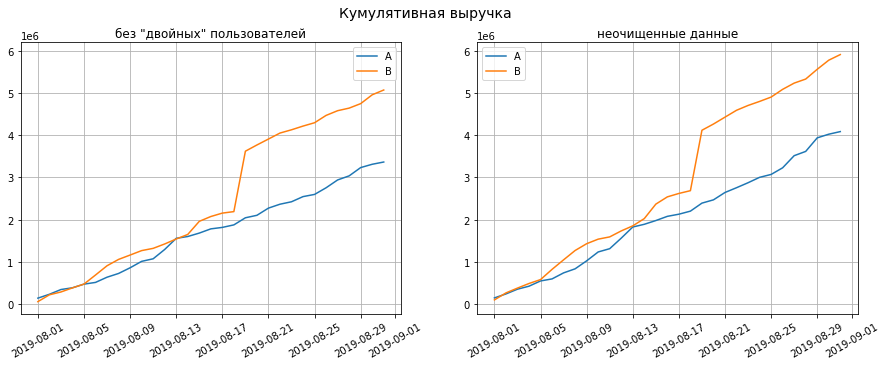

In [23]:
grafics(cumulative_graf, 'Кумулятивная выручка')



<div style='border:solid blue 1px; padding: 10px'>    
<b> Выводы и предположения:</b>
    
* Кумулятивная выручка по группам растет, группа В показывает лучший рост.
* рост в группе А довольно равномерный (небольшой выделяющийся рост был с 10 по 13 августа)
* По группе В есть несколько точек с резким ростом:с 13-15 августа и  сильный скачок в период с 17 по 20 августа (это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке).
* вид графиков практически одинаковый и для "грязных" данных и для "чистых" ("двойные" пользователи не повлияли на вид графиков)


### <font color='DarkBlue'>  Построим график кумулятивного среднего чека по группам. 

In [24]:
def cumulative_graf_cheque(cumulative_data):
    cumulative_revenue_a, cumulative_revenue_b = cumulative_revenue(cumulative_data)
    plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
    plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
    plt.grid(which='major')
    plt.xticks(rotation=30)
    plt.legend()

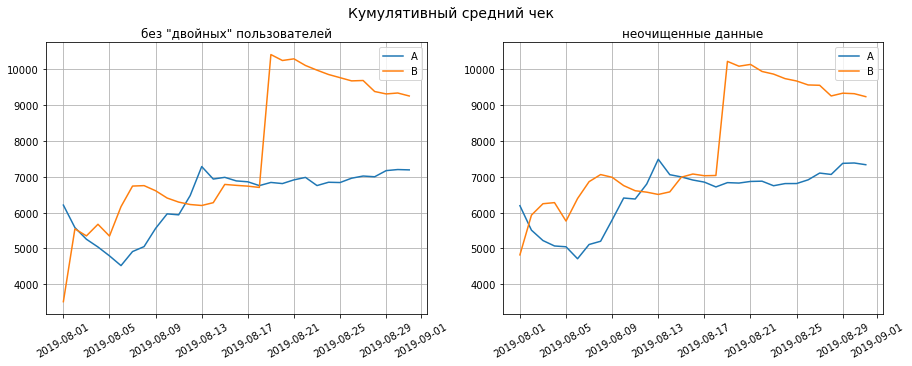

In [25]:
grafics(cumulative_graf_cheque, 'Кумулятивный средний чек')




<div style='border:solid blue 1px; padding: 10px'>    
<b> Выводы и предположения:</b>
    
* Средний чек группы А сначала падал. потом пошел в рост и стабилизировался около 7000 (убрав "двойных" пользователей мы немного уменьшили стабилизированный средний чек)
* Средний куммулятивный чек группы В вел себя постоянно нестабильно, то увеличивался, то снижался, потом резкий рост и начало падения (нельзя сказать, что он стабилизировался). Этой группе нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

### <font color='DarkBlue'>  Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 

In [26]:
# собираем данные в одном датафрейме
def merged_cumulative_revenue(cumulative_data):
    cumulative_revenue_a, cumulative_revenue_b = cumulative_revenue(cumulative_data)
    merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

    # cтроим отношение средних чеков
    plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)
    plt.xticks(rotation=30)
    # добавляем ось X
    plt.axhline(y=0, color='black', linestyle='--')

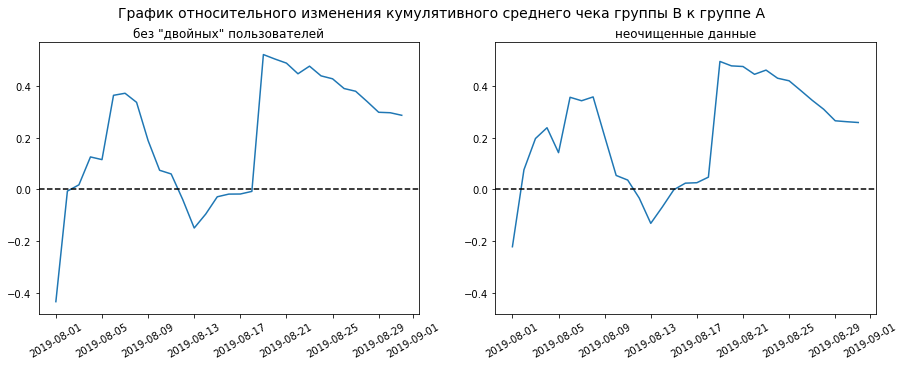

In [27]:
grafics(merged_cumulative_revenue, 'График относительного изменения кумулятивного среднего чека группы B к группе A ')


<div style='border:solid blue 1px; padding: 10px'>    
<b> Выводы и предположения:</b>
    
* В нескольких точках график различия между сегментами резко «скачет». На это влияет или резкое увеличение количества заказов или стоимости заказа

### <font color='DarkBlue'>  Построим график кумулятивного абсолютного среднего количества заказов  по группам.  

In [28]:
# считаем кумулятивное среднее количество заказов
def cumulative_average_orders_2(cumulative_data):
    # метод expanding() - позволяет считать кумулятивные значения
 # отделяем данные по группе A   
    cumulative_data_a_2 = cumulative_data.query('group =="A"')
    cumulative_data_a_2['avg_orders'] = cumulative_data_a_2['orders'].expanding().mean()

# отделяем данные по группе B
    cumulative_data_b_2 = cumulative_data.query('group =="B"')
    cumulative_data_b_2['avg_orders'] = cumulative_data_b_2['orders'].expanding().mean()
    return cumulative_data_a_2, cumulative_data_b_2
def cumulative_average_orders_graf_2 (cumulative_data):  
    cumulative_data_a, cumulative_data_b = cumulative_average_orders_2(cumulative_data)
# строим графики
    plt.plot(cumulative_data_a['date'], cumulative_data_a['avg_orders'], label='A')
    plt.plot(cumulative_data_b['date'], cumulative_data_b['avg_orders'], label='B')
    plt.grid(which='major')
    plt.xticks(rotation=30)
    plt.legend()

C:\Users\Margarita\AppData\Local\Temp\ipykernel_14264\2734492858.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cumulative_data_a_2['avg_orders'] = cumulative_data_a_2['orders'].expanding().mean()
C:\Users\Margarita\AppData\Local\Temp\ipykernel_14264\2734492858.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cumulative_data_b_2['avg_orders'] = cumulative_data_b_2['orders'].expanding().mean()
C:\Users\Margarita\AppData\Local\Temp\ipykernel_14264\2734492858.py:6: SettingWithCopyWarning: 
A value is 

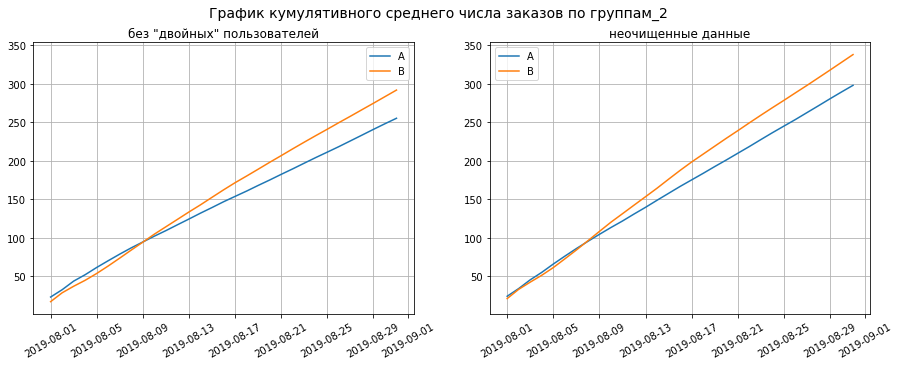

In [29]:
grafics(cumulative_average_orders_graf_2, 'График кумулятивного среднего числа заказов по группам_2')

<div style='border:solidь blue 1px; padding: 10px'>    
<b> Выводы и предположения:</b>
    
* Куммулятивное среднее число заказов по группе В стало выше группы А после 8 августа, разница постоянно увеличивалась
* Куммулятивное среднее число заказов по обеим группам за 31 день выросло

### <font color='DarkBlue'>  Построим график относительного изменения кумулятивного среднего количества заказов группы B к группе A Вариант 2 

In [30]:
def merged_cumulative_average_orders_graf(cumulative_data):
    cumulative_data_a, cumulative_data_b = cumulative_average_orders_2(cumulative_data)
    merged_cumulative_average_orders= cumulative_data_a[['date','avg_orders']].merge(cumulative_data_b[['date','avg_orders']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
    plt.plot(merged_cumulative_average_orders['date'], merged_cumulative_average_orders['avg_ordersB']/merged_cumulative_average_orders['avg_ordersA']-1)
    plt.grid(which='major')
    plt.xticks(rotation=30)
    plt.axhline(y=0, color='black', linestyle='--')

C:\Users\Margarita\AppData\Local\Temp\ipykernel_14264\2734492858.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cumulative_data_a_2['avg_orders'] = cumulative_data_a_2['orders'].expanding().mean()
C:\Users\Margarita\AppData\Local\Temp\ipykernel_14264\2734492858.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cumulative_data_b_2['avg_orders'] = cumulative_data_b_2['orders'].expanding().mean()
C:\Users\Margarita\AppData\Local\Temp\ipykernel_14264\2734492858.py:6: SettingWithCopyWarning: 
A value is 

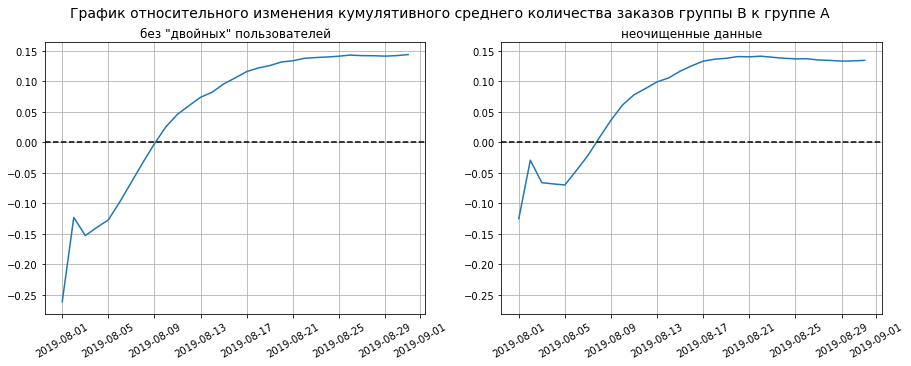

In [31]:
grafics(merged_cumulative_average_orders_graf, 'График относительного изменения кумулятивного среднего количества заказов группы B к группе A')

<div style='border:solid blue 1px; padding: 10px'>    
<b> Выводы и предположения:</b>
    
* Относительная разница в куммулятивном среднем количестве заказов начиная с 8 августа  в пользу группы А, стабилизировалась на уровне ~ 15%

### <font color='DarkBlue'>  Построим график кумулятивного среднего количества заказов  по группам. 

In [32]:
# считаем кумулятивное среднее количество заказов
def cumulative_average_orders(cumulative_data):
    cumulative_data['avg_orders'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A
    cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
    cumulative_data_b = cumulative_data[cumulative_data['group']=='B']
    return cumulative_data_a, cumulative_data_b
def cumulative_average_orders_graf (cumulative_data):  
    cumulative_data_a, cumulative_data_b = cumulative_average_orders(cumulative_data)
# строим графики
    plt.plot(cumulative_data_a['date'], cumulative_data_a['avg_orders'], label='A')
    plt.plot(cumulative_data_b['date'], cumulative_data_b['avg_orders'], label='B')
    plt.grid(which='major')
    plt.xticks(rotation=30)
    plt.legend()




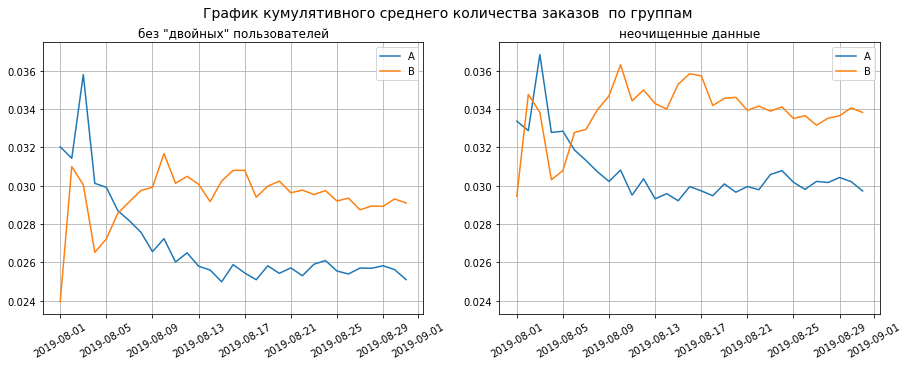

In [33]:
grafics(cumulative_average_orders_graf, 'График кумулятивного среднего количества заказов  по группам')

<div style='border:solid blue 1px; padding: 10px'>    
<b> Выводы и предположения:</b>
    
  * Сначала среднее куммулятивное количество заказов в группе А превалировало над группой В, но потом (после 6 августа) куммулятивное среднее количество заказов стало в группе А падать, придя к колебаниям около 0.025 (0.03 в неочищенных данных)
  * Куммулятивное среднее количество заказов группы В сначало росло (был спад в обоих группах 2-4 августа), но стабилизировалось около 0.029(0.034)
    * "Двойные" пользователи оказали влияние на стабилизированное куммуляятивное среднее количество заказов (цифры уменьшились, но основные скачки остались)
    * Отличия между группами очень маленькие (0.025  к 0.029 А к В в очищенных данных (0.03 и 0.034 соответсвенно в неочищенных), шкала графика имеет большой масштаб. 

### <font color='DarkBlue'>  Построим график относительного изменения кумулятивного среднего количества заказов группы B к группе A. 

In [34]:
def merged_cumulative_conversions_graf(cumulative_data):
    cumulative_data_a, cumulative_data_b = cumulative_average_orders(cumulative_data)
    merged_cumulative_average_orders= cumulative_data_a[['date','avg_orders']].merge(cumulative_data_b[['date','avg_orders']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
    plt.plot(merged_cumulative_average_orders['date'], merged_cumulative_average_orders['avg_ordersB']/merged_cumulative_average_orders['avg_ordersA']-1)
    plt.grid(which='major')
    plt.xticks(rotation=30)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.axhline(y=-0.1, color='grey', linestyle='--')
    plt.axhline(y=0.1, color='grey', linestyle='--')

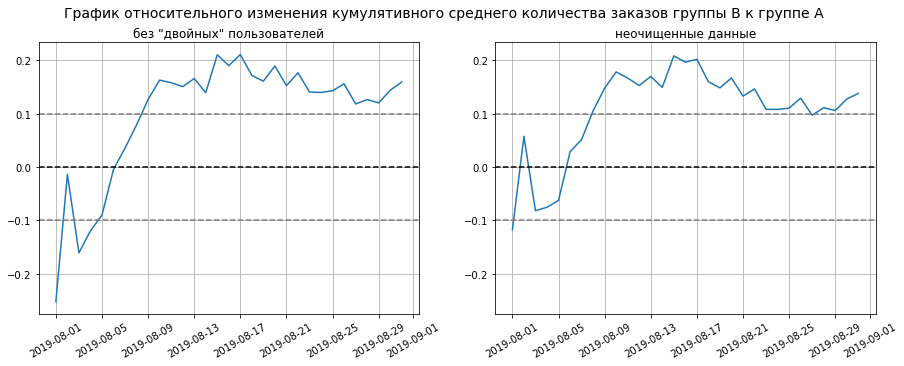

In [35]:
grafics(merged_cumulative_conversions_graf, 'График относительного изменения кумулятивного среднего количества заказов группы B к группе A')

<div style='border:solid blue 1px; padding: 10px'>    
<b> Выводы и предположения:</b>
    
* В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Потом её куммулятивный среднее количество заказов падало, но все равно оставалось выше, чем группы А
* В целом отношение ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. 
    
    Сперва стоит проанализировать аномалии, возможно, они изменят картину.
   

### <font color='DarkBlue'>  Построим точечный график количества заказов по пользователям.

In [36]:
# функция для построения точечного графика заданного параметра
def scater_x (data, x):
    x_values = pd.Series(range(0,len(data[x])))
    plt.scatter(x_values, data[x], alpha =0.5) 
    plt.grid(which='major')

In [37]:
# таблица заказов пользователей 
orders_by_users = orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'})
orders_by_users.columns = ['visitor_id', 'orders']
orders_by_users_without_double_visitors = orders_without_double_visitors.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'})
orders_by_users_without_double_visitors.columns  = ['visitor_id', 'orders']


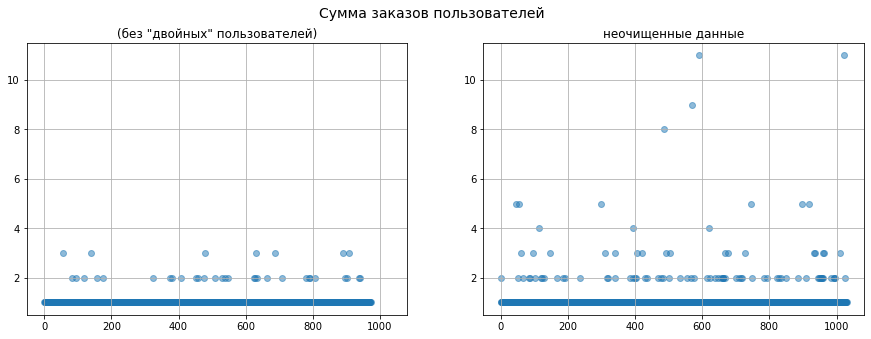

In [38]:
fig, axes = plt.subplots(1, 2)
axes[1] = plt.subplot(121)
scater_x(orders_by_users_without_double_visitors, 'orders')
plt.title('(без "двойных" пользователей)')
plt.subplot(122, sharex=axes[1], sharey=axes[1])
scater_x(orders_by_users, 'orders')
plt.title('неочищенные данные')
fig.suptitle('Сумма заказов пользователей',fontsize = 14)
fig.set_size_inches(15, 5)
plt.show()

Так в предобработке данных сразу был выявлен аномальный заказ в размере 1 294 500 у.е., который сильно влияет на масштаб получившегося графика, построим еще раз точечный график заказов, убрав этот заказ из рассмотрения

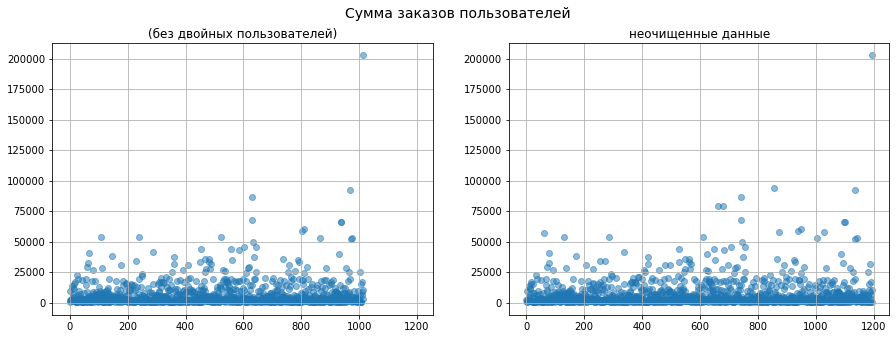

In [39]:
fig, axes = plt.subplots(1, 2)
axes[1] = plt.subplot(121)
scater_x (orders_without_double_visitors.query('revenue < 1200000'), 'revenue')
plt.title('(без двойных пользователей)')
plt.subplot(122, sharex=axes[1], sharey=axes[1])
scater_x (orders.query('revenue < 1200000'), 'revenue')
plt.title('неочищенные данные')
fig.suptitle('Сумма заказов пользователей',fontsize = 14)
fig.set_size_inches(15, 5)
plt.show()

<div style='border:solid blue 1px; padding: 10px'>    
<b> Выводы и предположения:</b>
    * Больщинство пользователей сделало 1 заказ. 
    
    * "двойные" пользователи давали аномальное количество заказов (4 и более). Убрав их, мы практически убрали все аномальные заказы.

### <font color='DarkBlue'>   Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей. 

In [40]:
print('95-й и 99-й персентиль для заказов без двойных пользователей:', np.percentile(orders_by_users_without_double_visitors['orders'], [95, 99]))
print('95-й и 99-й персентиль для неочищенных данных:', np.percentile(orders_by_users['orders'], [95, 99]))

95-й и 99-й персентиль для заказов без двойных пользователей: [1. 2.]
95-й и 99-й персентиль для неочищенных данных: [2. 4.]


<div style='border:solid blue 1px; padding: 10px'>    
<b> Выводы и предположения:</b>
    
* Не более 5% пользователей делали больше 1 (2 для неочищенных данных) заказов и не более 1% больше 2 (4) заказов.
*  По этим данным можно сделать вывод, что именно "двойные" пользователи давали аномально высокое количество заказов
* Устанавливаем границу для определения нормальных пользователей - в 2 заказа

### <font color='DarkBlue'>  Построим точечный график стоимостей заказов. 

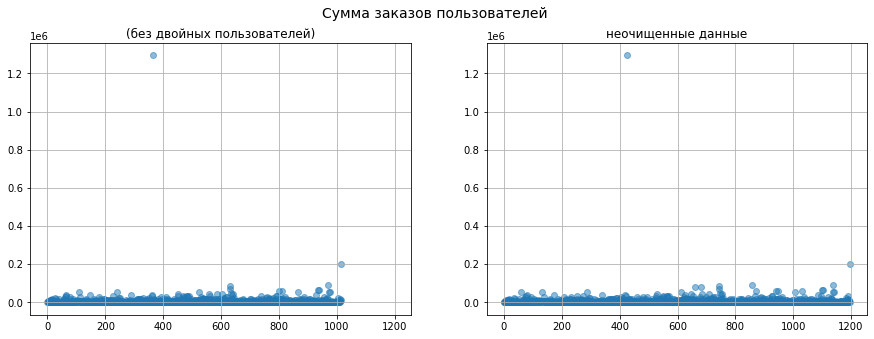

In [41]:
fig, axes = plt.subplots(1, 2)
axes[1] = plt.subplot(121)
scater_x (orders_without_double_visitors, 'revenue')
plt.title('(без двойных пользователей)')
plt.subplot(122, sharex=axes[1], sharey=axes[1])
scater_x (orders, 'revenue')
plt.title('неочищенные данные')
fig.suptitle('Сумма заказов пользователей',fontsize = 14)
fig.set_size_inches(15, 5)
plt.show()

<div style='border:solid blue 1px; padding: 10px'>    
<b> Выводы и предположения:</b>
    
* самые аномальные заказы "двойные" пользователи не убрали (max сумма - 1 294 500 была замечена при исследовании данных, и 200 000 )
* по графику сложно опредилить границу нормальных заказов (25-50 тыс). Посчитаем перцентили

### <font color='DarkBlue'>  Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [42]:
print('95-й и 99-й персентиль для заказов без двойных пользователей:', np.percentile(orders_without_double_visitors['revenue'], [95, 99]))
print('95-й и 99-й персентиль для неочищенных данных:', np.percentile(orders['revenue'], [95, 99]))

95-й и 99-й персентиль для заказов без двойных пользователей: [26785. 53904.]
95-й и 99-й персентиль для неочищенных данных: [28000.  58233.2]


<div style='border:solid blue 1px; padding: 10px'>    
<b> Выводы и предположения:</b>
    
* Не более 5% заказов дороже 26785  (28000 для неочищенных данных) условных единиц (у.е.) и не более 1% дороже 53904 (58233.2) у.е.
* Установим границу нормальности заказов - в 28000 у.е.
  

### <font color='DarkBlue'>  Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. 

Сформулируем гипотезы.

- Нулевая: различий в среднем количестве заказов между группами нет. 
- Альтернативная: различия в среднем количестве заказов  между группами есть.

Проверяем гипотезы методом Манна-Уитни, так как он не требует нормального распределения выбранных совокупностей. Уровень значимости - 0.05

In [43]:
def stat_value_avg_orders(orders, visitors,text):
    orders_by_users_a = orders.query('group == "A"').groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique})
    orders_by_users_a.columns = ['visitor_id', 'orders']
    orders_by_users_b = orders.query('group == "B"').groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique})
    orders_by_users_b.columns = ['visitor_id', 'orders']
    sample_a = pd.concat([orders_by_users_a['orders'],pd.Series(0, index=np.arange(visitors.query('group == "A"')['visitors'].sum() - len(orders_by_users_a['orders'])), name='orders')],axis=0)
    sample_b = pd.concat([orders_by_users_b['orders'],pd.Series(0, index=np.arange(visitors.query('group == "B"')['visitors'].sum() - len(orders_by_users_b['orders'])), name='orders')],axis=0)
    p_value = stats.mannwhitneyu(sample_a, sample_b)[1]
    print(text)
    if p_value > 0.05:
        print(f'p-value = {"{0:.5f}".format(p_value)} больше 0.05. Значит, нулевую гипотезу не отвергаем')
    else:
        print(f'p-value = {"{0:.5f}".format(p_value)} меньше 0.05. Значит, нулевую гипотезу отвергаем')
    growth =  '{0:.3f}".format(sample_b.mean() / sample_a.mean() - 1 )'  
    print('Относительный прирост среднего числа заказов группы B к средннему числу заказов группы А:')
    print("{0:.3%}".format(sample_b.mean() / sample_a.mean() - 1))

In [44]:
stat_value_avg_orders(orders, visitors,'Изначальные данные')

stat_value_avg_orders(orders_without_double_visitors, visitors_without_double_visitors, 'Данные, очищенные от "двойных" пользователей')

Изначальные данные
p-value = 0.01679 меньше 0.05. Значит, нулевую гипотезу отвергаем
Относительный прирост среднего числа заказов группы B к средннему числу заказов группы А:
13.808%
Данные, очищенные от "двойных" пользователей
p-value = 0.01109 меньше 0.05. Значит, нулевую гипотезу отвергаем
Относительный прирост среднего числа заказов группы B к средннему числу заказов группы А:
15.962%


<div style='border:solid blue 1px; padding: 10px'>    
<b> Выводы и предположения:</b>
    
Что по очищенным от "двойных" пользователей, что по изначальным данным принимаем альтернативную гипотезу, что различия между группами пользователей по среднему числу заказов есть. При чем по очищенным данным относительная разница больше (16% против 14%)   
    

### <font color='DarkBlue'>  Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

Сформулируем гипотезы.

- Нулевая: различий в среднем чеке между группами нет. 
- Альтернативная: различия в среднем чеке между группами есть.

Проверяем гипотезы методом Манна-Уитни, так как он не требует нормального распределения выбранных совокупностей. Уровень значимости - 0.05

In [45]:
def stat_value_avg_revenue(orders, visitors,text):
    p_value = stats.mannwhitneyu(orders.query('group == "A"')['revenue'], orders.query('group == "B"')['revenue'])[1]
    print(text)
    if p_value > 0.05:
        print(f'p-value = {"{0:.5f}".format(p_value)} больше 0.05. Значит, нулевую гипотезу не отвергаем')
    else:
        print(f'p-value = {"{0:.5f}".format(p_value)} меньше 0.05. Значит, нулевую гипотезу отвергаем')
    growth =  '{0:.3f}".format(sample_b.mean() / sample_a.mean() - 1 )'  
    print('Относительные различия в среднем чеке между группами:')
    print("{0:.3%}".format(orders.query('group == "B"')['revenue'].mean() / orders.query('group == "A"')['revenue'].mean() - 1))

In [46]:
stat_value_avg_revenue(orders, visitors,'Изначальные данные')

stat_value_avg_revenue(orders_without_double_visitors, visitors_without_double_visitors, 'Данные, очищенные от "двойных" пользователей')

Изначальные данные
p-value = 0.72929 больше 0.05. Значит, нулевую гипотезу не отвергаем
Относительные различия в среднем чеке между группами:
25.871%
Данные, очищенные от "двойных" пользователей
p-value = 0.82949 больше 0.05. Значит, нулевую гипотезу не отвергаем
Относительные различия в среднем чеке между группами:
28.660%


<div style='border:solid blue 1px; padding: 10px'>    
<b> Выводы и предположения:</b>
    
* Критерий  Манна-Уитни показывает, что различий в среднем чеке между группами нет.
* Однако, относительные различия составляют 25.87% (28.66% по очищенным от "двойных" пользователей данным), что говорит нам о влиянии выбросов на метрику
    
   

### <font color='DarkBlue'>  Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «очищенным» от аномальных заказов данным (количество заказов не больше 2, сумма заказа < 28000). 

In [47]:
# установим границы нормальности:
normal_orders =  np.percentile(orders_by_users['orders'], 95)
normal_revenue = np.percentile(orders['revenue'], 95)

найдем пользователей, которые не подходят под наши критерии 

In [48]:
def without_abnormal_users(orders,orders_by_users):
    users_with_many_orders = orders_by_users.query('orders >2')['visitor_id'] 
    users_with_expensive_orders = orders[orders['revenue'] > 28000]['visitor_id']
    abnormal_users_id = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0).unique())
    return orders.query('visitor_id not in @abnormal_users_id'), len(abnormal_users_id)


In [49]:
orders_without_abnormal_users, count_abnormal_users = without_abnormal_users(orders,orders_by_users)
print('Количество аномальных пользователей в изначальных данных:',count_abnormal_users )

Количество аномальных пользователей в изначальных данных: 83


Сформулируем гипотезы.

- Нулевая: различий в среднем количестве заказов между группами нет. 
- Альтернативная: различия в среднем количестве заказов  между группами есть.

In [50]:
stat_value_avg_orders(orders_without_abnormal_users, visitors,'Данные, очищенные от аномальных пользователей')

Данные, очищенные от аномальных пользователей
p-value = 0.01219 меньше 0.05. Значит, нулевую гипотезу отвергаем
Относительный прирост среднего числа заказов группы B к средннему числу заказов группы А:
17.566%


По очищенным данным статистическая значимость не изменилась, различия есть. Относительный прирост среднего числа заказов в группе B перед группой А по очищенным данным увеличился. 

In [51]:
orders_without_abnormal_and_double_users, count_abnormal_users = without_abnormal_users(orders_without_double_visitors,orders_by_users_without_double_visitors)
print('Количество аномальных пользователей в очищенных от "двойных" пользователей данных:',count_abnormal_users )

Количество аномальных пользователей в очищенных от "двойных" пользователей данных: 55


Как и следовало ожидать, при очистке от "двойных" пользователей мы изюавились и от части аномальных пользователей.

Посмотрим статистическую значимость различий в среднем количестве заказов между группами по «очищенным» от аномальных заказов данным 

Сформулируем гипотезы.

- Нулевая: различий в среднем количестве заказов между группами нет. 
- Альтернативная: различия в среднем количестве заказов  между группами есть.

In [52]:
stat_value_avg_orders(orders_without_abnormal_and_double_users, visitors_without_double_visitors,'Данные, очищенные от аномальных и двойных пользователей')

Данные, очищенные от аномальных и двойных пользователей
p-value = 0.00953 меньше 0.05. Значит, нулевую гипотезу отвергаем
Относительный прирост среднего числа заказов группы B к средннему числу заказов группы А:
18.840%


По полностью очищенным данным картина та же самая. Нулевую гипотезу о равенстве среднего количества заказов в группах отвергаем. Относительная разница в среднем количестве заказов составляет 18.84%

<div style='border:solid blue 1px; padding: 10px'>    
<b> Выводы и предположения:</b>
    
* Результаты по среднему количеству заказов практически не изменились.
* Можно отметить, что чем "чище" данные, тем ниже p-value и больше отношение среднего количества заказов в группе В к заказам в группе А

### <font color='DarkBlue'>  Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Сформулируем гипотезы.

- Нулевая: различий в среднем чеке между группами нет. 
- Альтернативная: различия в среднем чеке между группами есть.

In [53]:
stat_value_avg_revenue(orders_without_abnormal_users, visitors,'Данные, очищенные от аномальных пользователей')

Данные, очищенные от аномальных пользователей
p-value = 0.75287 больше 0.05. Значит, нулевую гипотезу не отвергаем
Относительные различия в среднем чеке между группами:
-2.211%


In [54]:
stat_value_avg_revenue(orders_without_abnormal_and_double_users, visitors_without_double_visitors,'Данные, очищенные от аномальных и двойных пользователей')

Данные, очищенные от аномальных и двойных пользователей
p-value = 0.76169 больше 0.05. Значит, нулевую гипотезу не отвергаем
Относительные различия в среднем чеке между группами:
-2.245%


<div style='border:solid blue 1px; padding: 10px'>    
<b> Выводы и предположения:</b>
    
* Гипотезу о равенстве среднего чека отвергнуть не удалось ни по каким данным. 
* При этом очистка от аномальных пользователей привела к тому, что поменялась относительная разница между сегментами в небольшой плюс в сторону группы В 
    
  

In [55]:
# функция для построения всех графиков по данным, очищенным от "двойных" и аномальных пользователей, и неочищенным данным
def grafics_without_abnormal(grafic_name, title):
    fig, axes = plt.subplots(1, 2)
    axes[1] = plt.subplot(121)
    grafic_name(cumulative(orders_without_abnormal_and_double_users,visitors_without_double_visitors))
    plt.title('без "двойных" и аномальных пользователей')
    # настроим масштаб осей одинаковым у обоих графиков
    plt.subplot(122, sharex=axes[1], sharey=axes[1])
    grafic_name(cumulative(orders_without_abnormal_users,visitors))
    plt.title('без аномальных пользователей данные')
    fig.suptitle(title, fontsize = 14)
    fig.set_size_inches(15, 5)
    plt.show()

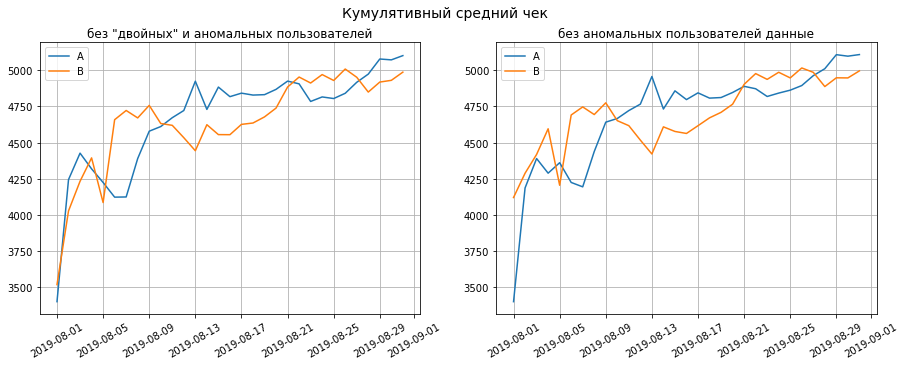

In [56]:
grafics_without_abnormal(cumulative_graf_cheque, 'Кумулятивный средний чек')

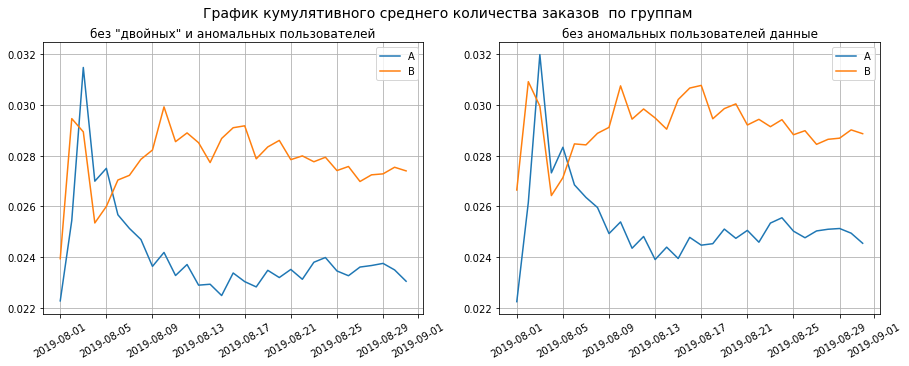

In [57]:
grafics_without_abnormal(cumulative_average_orders_graf, 'График кумулятивного среднего количества заказов  по группам')

### <font color='DarkBlue'>  Принятие решения по результатам теста. 

<div style='border:solid blue 1px; padding: 20px'>    
<b> Выводы </b>
    
* Как уже отмечалось в предобработке данных, нарушено существенное условие для проведения A/B теста, а именно независимость пользователей. Так как нам неизвестно количество "двойных" пользователей среди пользователей, не совершивших заказ (таблица visitors без id), то нельзя быть уверенными в проведенной очистке данных от двойных пользователей.  Поэтому первое желание - признать тест несостоявшимся, наказать виновных (видимо, не проведших А/А тест, чтобы проверить разделение трафика), и повторить тест.  
* если предположим, что мы уточнили у разработчиков данные по visitors, и убедились, что там нет двойных пользователей, то можно сделать вывод, что группа В победила, так как ее параметры лучше по всем данным (и очищенным от "двойных" пользователей, и очищенным от аномальных). Несмотря на практическое отсутствие разницы в среднем чеке между группами, среднее количество заказов в группе В значительно лучше (`18%)